<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Probability%20and%20Distribution/probability_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability and Distribution**

## Import Libraries and Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
xs = np.linspace(-5,10,200)
ks = np.arange(50)

## **Discrete PMFs**

Probability Mass Function for Binomial distribution, Poisson distribution

<BarContainer object of 50 artists>

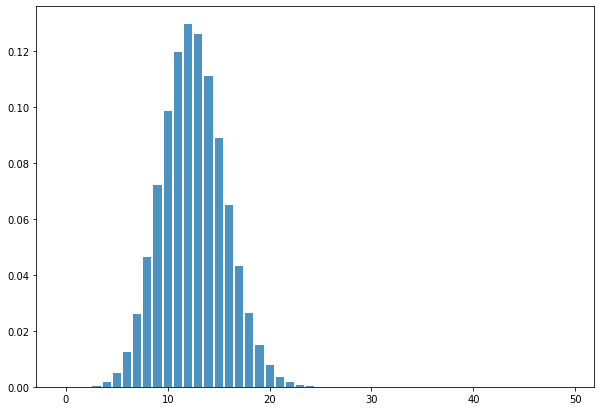

In [3]:
pmf_binom = st.binom.pmf(ks, 50, 0.25) # ks value, 50 events, each event with chance 25% succefully happening

fig, ax = plt.subplots(figsize=(10,7))
plt.bar(ks, pmf_binom, label="Binomial Example (dice)", alpha=0.8) 

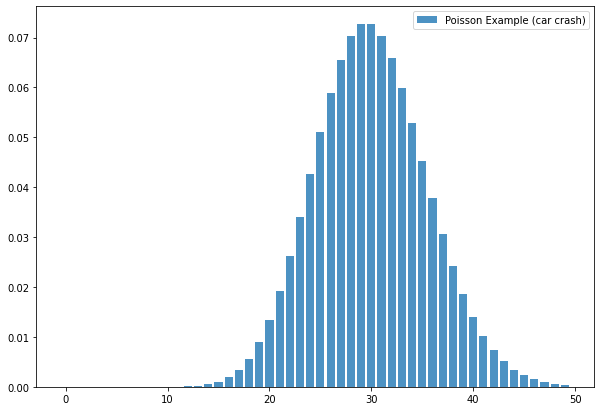

In [4]:
## Poisson distribution

pmf_poisson = st.poisson.pmf(ks, 30) # ks value, 30 rate of change

fig, ax = plt.subplots(figsize=(10,7))
plt.bar(ks, pmf_poisson, label="Poisson Example (car crash)", alpha=0.8)
plt.legend(); 

## **Continuous Distribution**

Uniform,normal,exponential,student-t,log-normal,skew-normal.

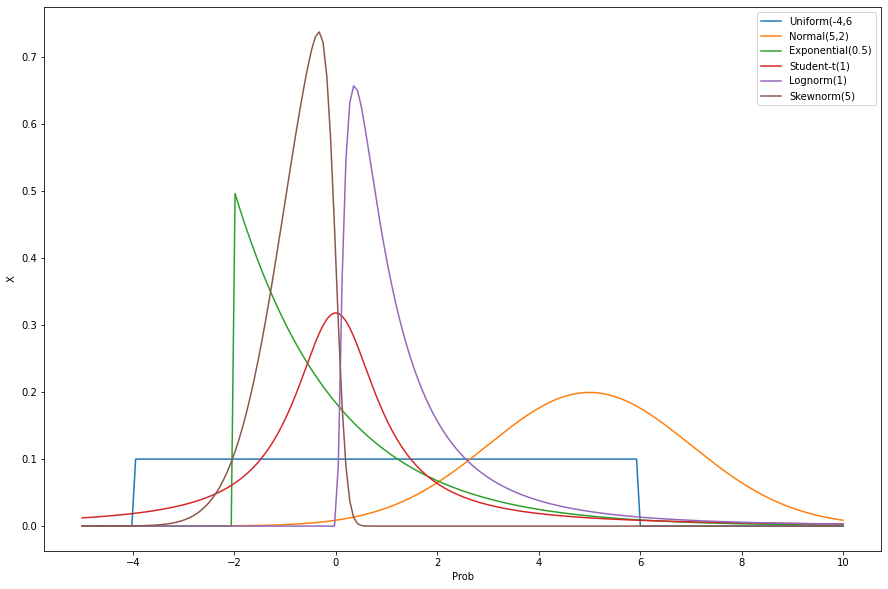

In [5]:
fig, ax = plt.subplots(figsize=(15,10))

pdf_uniform = st.uniform.pdf(xs, -4, 10)
plt.plot(xs, pdf_uniform, label=("Uniform(-4,6"))

pdf_normal = st.norm.pdf(xs, loc=5, scale=2)
plt.plot(xs, pdf_normal, label="Normal(5,2)")

pdf_exponential = st.expon.pdf(xs, loc=-2, scale=2)
plt.plot(xs, pdf_exponential, label="Exponential(0.5)")

pdf_studentt = st.t.pdf(xs,1)
plt.plot(xs, pdf_studentt, label="Student-t(1)")

pdf_lognorm = st.lognorm.pdf(xs,1)
plt.plot(xs, pdf_lognorm, label="Lognorm(1)")

pdf_skewnorm = st.skewnorm.pdf(xs, -6)
plt.plot(xs, pdf_skewnorm, label="Skewnorm(5)")

plt.legend()
plt.xlabel("Prob")
plt.ylabel("X");

## **Empirical PDFs**

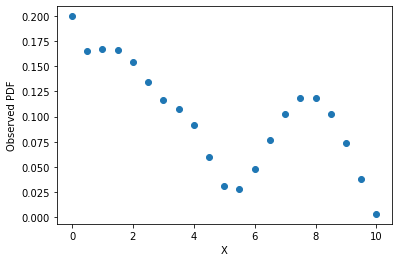

In [6]:
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
      5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]

ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 
      0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 
      0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

plt.scatter(xs,ys)
plt.xlabel("X")
plt.ylabel("Observed PDF");

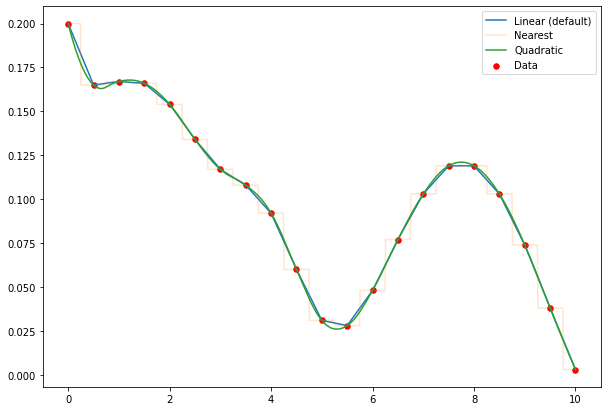

In [12]:
x = np.linspace(min(xs), max(xs), 1000)
y1 = interp1d(xs,ys)(x)
y2 = interp1d(xs, ys, kind="nearest")(x)
y3 = interp1d(xs, ys, kind="quadratic")(x)

fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(xs,ys, s=30, label="Data", c="r")
plt.plot(x,y1, label="Linear (default)")
plt.plot(x,y2, label="Nearest", alpha=0.2)
plt.plot(x,y3, label="Quadratic", ls="-")
plt.legend();

Using the **interp1d** we can now find a probability value for any **x** value.

How can we calculate the CDF and the probability we would find  a value between 2 bounds? Using **scipy.integrate**.

We have many options :

* **scipy.integrate.trapz** for low accuracy but high speed. Accuracy scales as O(h).

* **scipy.integrate.simps** for medium accuracy and pretty high speed. Accuracy scales as O(h^2)

* **scipy.integrate.quad** for high accuracy and low speed. Arbitrary accuracy.

In [11]:
from scipy.integrate import simps

def get_prob(xs,ys,a,b, resolution=1000):

  x_norm = np.linspace(min(xs), max(xs), resolution) 
  y_norm = interp1d(xs, ys, kind="quadratic")(x_norm)
  normalization = simps(y_norm, x=x_norm)
  
  x_vals = np.linspace(a,b, resolution)
  y_vals = interp1d(xs, ys, kind="quadratic")(x_vals)
  return simps(y_vals, x=x_vals) / normalization

def get_cdf(xs, ys, v):
  return get_prob(xs, ys, min(xs), v)

def get_sf(xs, ys, v):
  return 1 - get_cdf(xs, ys, v)

print(get_prob(xs, ys, 0, 10))      

1.0


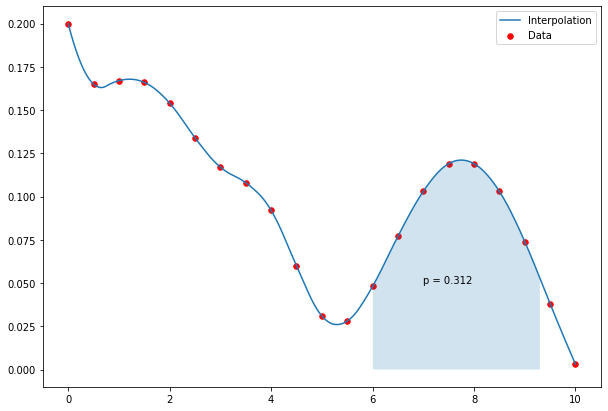

In [13]:
v1, v2 = 6, 9.3

area = get_prob(xs, ys, v1, v2)

fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(xs, ys, s=30, label="Data", color="r")
plt.plot(x, y3, linestyle="-", label="Interpolation")
plt.fill_between(x, 0, y3, where=(x>=v1)&(x<=v2), alpha=0.2)
plt.annotate(f"p = {area:.3f}", (7, 0.05))
plt.legend();

/usr/local/lib/python3.7/dist-packages/scipy/integrate/_quadrature.py:414: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/usr/local/lib/python3.7/dist-packages/scipy/integrate/_quadrature.py:416: RuntimeWarning: invalid value encountered in true_divide
  y[slice1] * (hsum * hsum / hprod) +


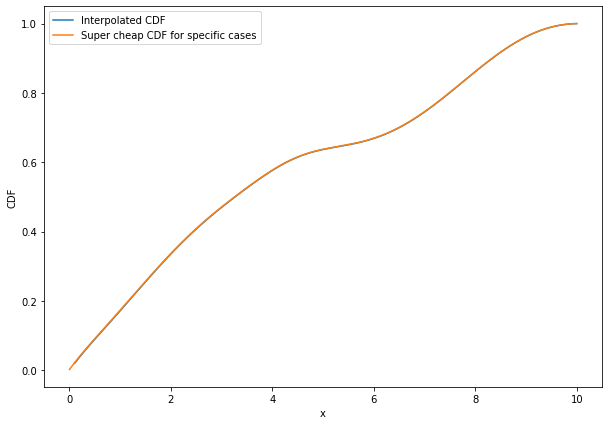

In [16]:
x_new = np.linspace(min(xs), max(xs), 100)
cdf_new = [get_cdf(xs, ys, i) for i in x_new]
cheap_cdf = y3.cumsum() / y3.sum()

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(x_new, cdf_new, label="Interpolated CDF")
plt.plot(x, cheap_cdf, label="Super cheap CDF for specific cases")
plt.ylabel("CDF")
plt.xlabel("x")
plt.legend();